# Phase 3 Project

# Beginning

### Business Problem: 

#### Enhancing Music Discovery and User Retention through Data-Driven Recommender System Optimization


## Overview

## Business and Data Understanding
To identify the music genres most likely to engage and retain first-time users by leveraging insights from genre popularity and audio feature analysis.
Understand the diversity of preferences to create a balanced onboarding experience for a wide audience.

The dataset contains information on songs, including attributes like genre, tempo, loudness, and energy. It combines audio features and metadata, enabling analysis of genre appeal and listener preferences.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Stats and explainability
from scipy import stats

# General utilities
import os
from datetime import datetime


In [3]:
# Loading the Dataset
file_path = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\Phase3Project\dataset.csv"

# Load the dataset
data = pd.read_csv(file_path)


In [4]:
# Displaying basic information about the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
data_head = data.head()

data_head

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
## Detect duplicate rows:
data.duplicated().sum()


0

In [7]:
##checking duplicate values
data.drop_duplicates(inplace=True)


In [8]:
# Handling missing values
data['artists'].fillna('Unknown', inplace=True)
data['album_name'].fillna('Unknown', inplace=True)
data['track_name'].fillna('Unknown', inplace=True)


C:\Users\chris.mutuku\AppData\Local\Temp\ipykernel_20056\3313784865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['artists'].fillna('Unknown', inplace=True)
C:\Users\chris.mutuku\AppData\Local\Temp\ipykernel_20056\3313784865.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [9]:
# Checking for outliers or invalid ranges (example for duration_ms)
data = data[data['duration_ms'] >= 0]  # Remove any negative durations

In [10]:
# Converting track_genre to categorical
data['track_genre'] = data['track_genre'].astype('category')

In [11]:
# Droping any other unnecessary columns or outliers
scaler = StandardScaler()
data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
      'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(
    data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
          'instrumentalness', 'liveness', 'valence', 'tempo']])

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        114000 non-null  int64   
 1   track_id          114000 non-null  object  
 2   artists           114000 non-null  object  
 3   album_name        114000 non-null  object  
 4   track_name        114000 non-null  object  
 5   popularity        114000 non-null  int64   
 6   duration_ms       114000 non-null  int64   
 7   explicit          114000 non-null  bool    
 8   danceability      114000 non-null  float64 
 9   energy            114000 non-null  float64 
 10  key               114000 non-null  int64   
 11  loudness          114000 non-null  float64 
 12  mode              114000 non-null  int64   
 13  speechiness       114000 non-null  float64 
 14  acousticness      114000 non-null  float64 
 15  instrumentalness  114000 non-null  float64 
 16  li

# EDA

In [13]:
# Basic descriptive statistics for numerical columns
data.describe()

# Summary statistics for categorical columns
data.describe(include=['object', 'category'])


,track_id,artists,album_name,track_name,track_genre
count,114000,114000,114000,114000,114000
unique,89741,31438,46590,73609,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


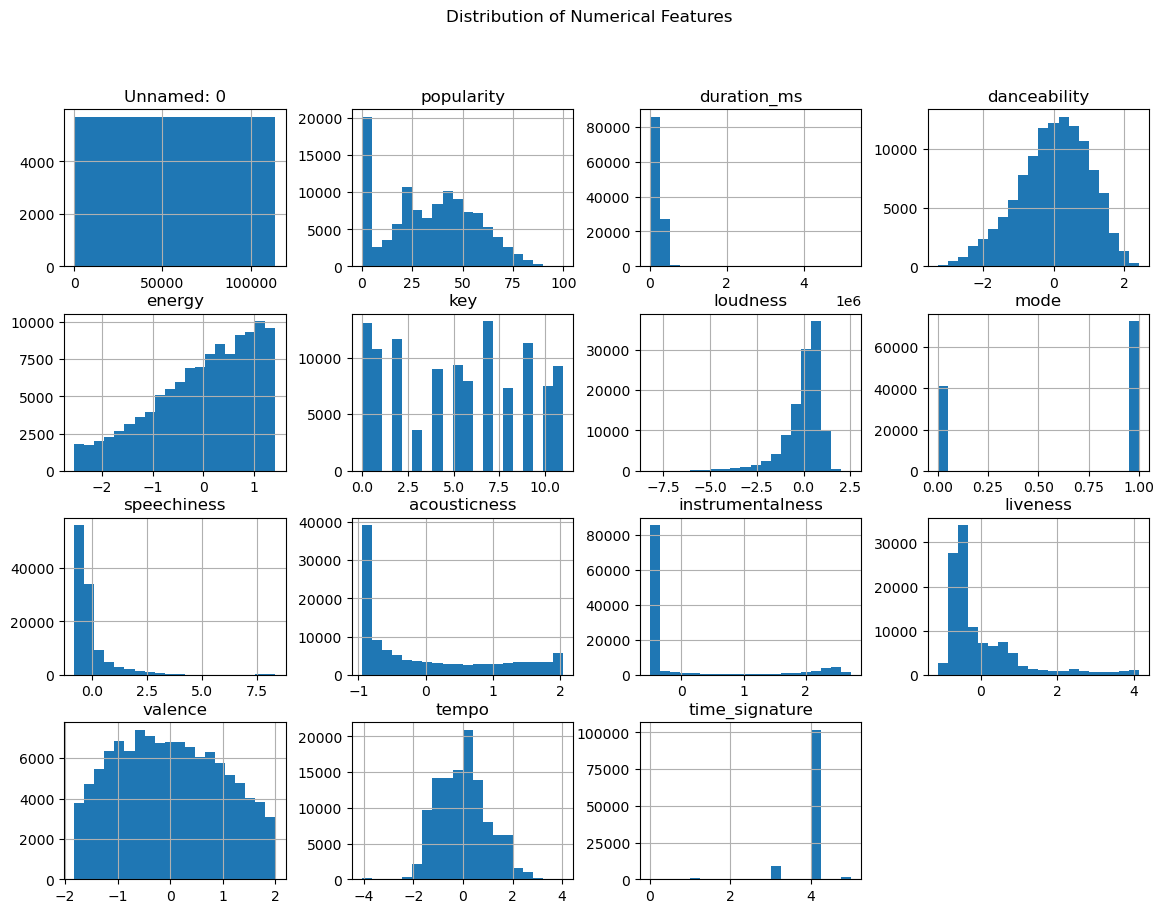

In [17]:
# Plot histograms for continuous variables
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


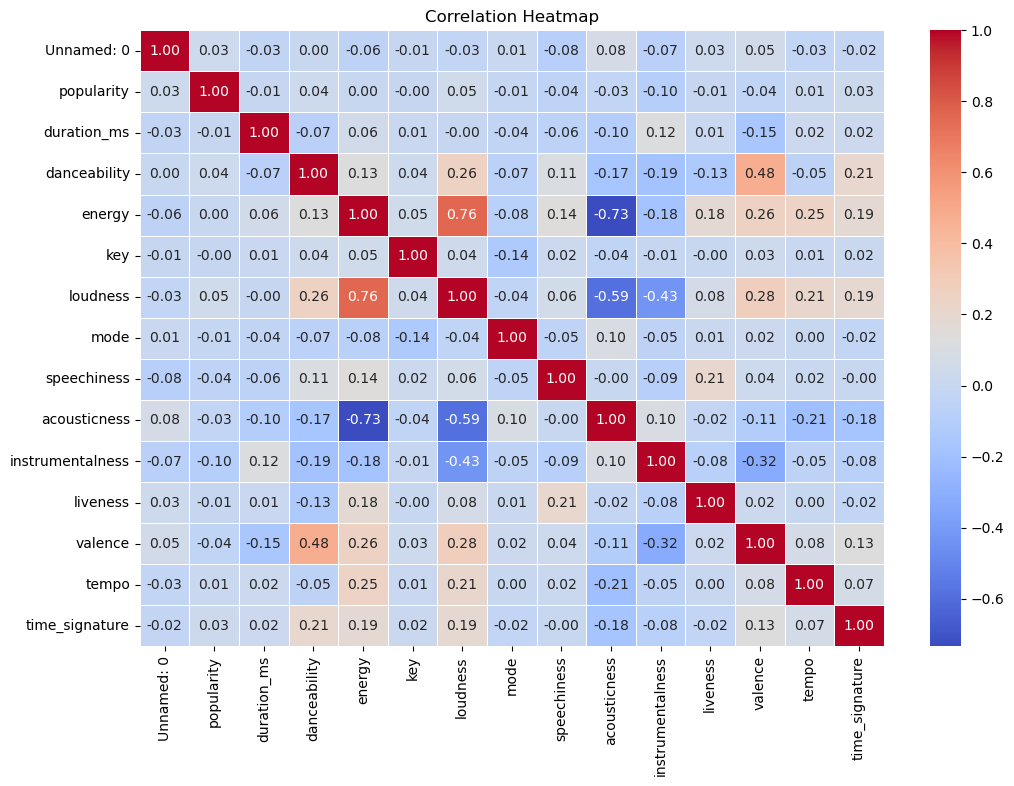

In [15]:
# Calculating correlation matrix
corr_matrix = data[num_cols].corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


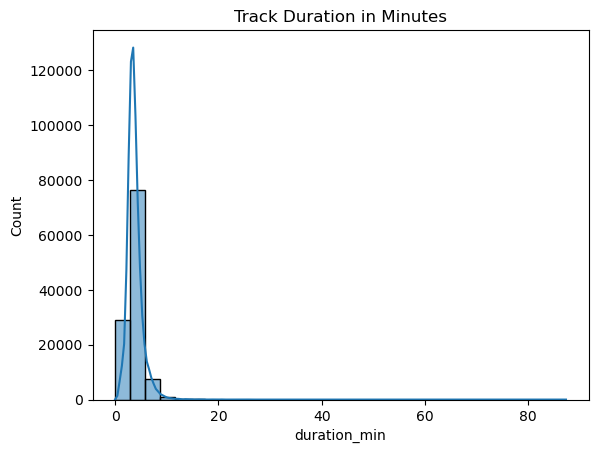

In [18]:
data['duration_min'] = data['duration_ms'] / 60000
sns.histplot(data['duration_min'], kde=True, bins=30)
plt.title("Track Duration in Minutes")
plt.show()
